In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_metodoanticonceptivo = pd.read_csv('https://query.data.world/s/kmtzduntrfduzq7ock75atyluguk6z')

Este conjunto de datos es un subconjunto de la Encuesta nacional de prevalencia de anticonceptivos de Indonesia de 1987. Las muestras son mujeres casadas que no estaban embarazadas o no saben si estaban en el momento de la entrevista. El problema es predecir la elección actual del método anticonceptivo (sin uso, métodos a largo plazo o métodos a corto plazo) de una mujer en función de sus características demográficas y socioeconómicas.

Edad de la esposa (numérica)

Educación de la esposa (categórica) 1 = baja, 2, 3, 4 = alta

Educación del esposo (categórica) 1 = baja, 2, 3, 4 = alta

Número de hijos nacidos (numérico)

Religión de la esposa (binaria) 0 = No Islam, 1 = Islam

¿La esposa ahora está trabajando? (binario) 0 = Sí, 1 = No

Ocupación del esposo (categórica) 1, 2, 3, 4

Índice de nivel de vida (categórico) 1 = bajo, 2, 3, 4 = alto

Exposición a los medios (binario) 0 = Bueno, 1 = No bueno

Método anticonceptivo utilizado (atributo de clase) 1 = Sin uso, 2 = A largo plazo, 3 = A corto plazo

In [3]:
df_metodoanticonceptivo.columns = ['edad_esposa', 'educacion_esposa', 'educacion_esposo', 'numero_hijos_nacidos',
                   'religion_esposa', 'trabaja_esposa', 'ocupacion_esposo',
                   'ind_nivel_vida', 'expo_medios', 'metodo_anticonceptivo']
df_metodoanticonceptivo.head()

,edad_esposa,educacion_esposa,educacion_esposo,numero_hijos_nacidos,religion_esposa,trabaja_esposa,ocupacion_esposo,ind_nivel_vida,expo_medios,metodo_anticonceptivo
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


Número de religión de la esposa

In [4]:
religion_esposa = pd.value_counts(df_metodoanticonceptivo['religion_esposa'])
religion_esposa

1    1252
0     220
Name: religion_esposa, dtype: int64

In [5]:
religion_esposa2 = df_metodoanticonceptivo.groupby("religion_esposa").size()
religion_esposa2

religion_esposa
0     220
1    1252
dtype: int64

Porcentaje de religión

In [6]:
labels= [str(round(i/religion_esposa.sum()*100,1))+'%' for i in religion_esposa]
labels

['85.1%', '14.9%']

In [7]:
labels[0] = 'Islam ' + labels[0] 
labels[1] = 'No Islam ' + labels[1] 
labels

['Islam 85.1%', 'No Islam 14.9%']

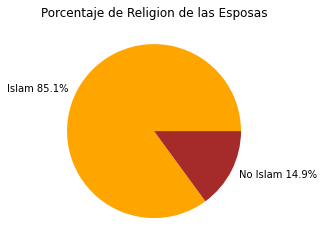

In [8]:
plt.pie(religion_esposa,labels=labels,colors=['orange','brown'])
plt.title('Porcentaje de Religion de las Esposas')
plt.show()

*Podemos ver que el 85.1% de las esposas son de la religión Islam. Acá nos podríamos preguntar si este porcentaje tiene correlación con el uso de autoconceptivos.*

In [9]:
df_metodoanticonceptivo['edad_cat']=pd.cut(df_metodoanticonceptivo.edad_esposa,bins=[df_metodoanticonceptivo.edad_esposa.min()-1,27,39,df_metodoanticonceptivo.edad_esposa.max()+1])

In [10]:
df_metodoanticonceptivo.head()

,edad_esposa,educacion_esposa,educacion_esposo,numero_hijos_nacidos,religion_esposa,trabaja_esposa,ocupacion_esposo,ind_nivel_vida,expo_medios,metodo_anticonceptivo,edad_cat
0,45,1,3,10,1,1,3,4,0,1,"(39, 50]"
1,43,2,3,7,1,1,3,4,0,1,"(39, 50]"
2,42,3,2,9,1,1,3,3,0,1,"(39, 50]"
3,36,3,3,8,1,1,3,2,0,1,"(27, 39]"
4,19,4,4,0,1,1,3,3,0,1,"(15, 27]"


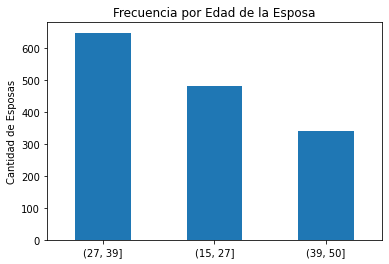

In [11]:
plot=pd.value_counts(df_metodoanticonceptivo.edad_cat).plot(kind='bar',
                                                           title='Frecuencia por Edad de la Esposa',
                                                        rot=0)
plot.set_ylabel('Cantidad de Esposas')
plt.show()

In [12]:
import seaborn as sns
import os


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


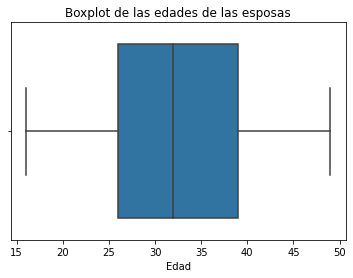

In [13]:
sns.boxplot(df_metodoanticonceptivo.edad_esposa)
plt.title('Boxplot de las edades de las esposas')
plt.xlabel('Edad')
plt.show()

*La edad promedio de las esposas es de 32 años aproximadamente*

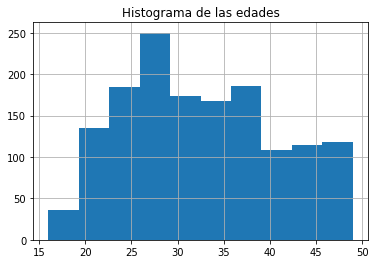

In [14]:
df_metodoanticonceptivo.edad_esposa.hist()
plt.title('Histograma de las edades')
plt.show()

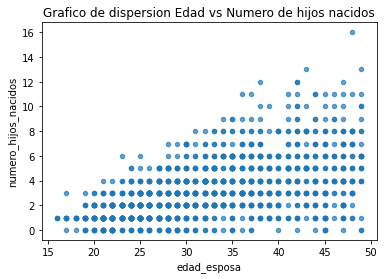

In [15]:
df_metodoanticonceptivo.plot.scatter(x='edad_esposa',
                                    y='numero_hijos_nacidos',
                                    alpha=0.7)
plt.title("Grafico de dispersion Edad vs Numero de hijos nacidos")
plt.show()

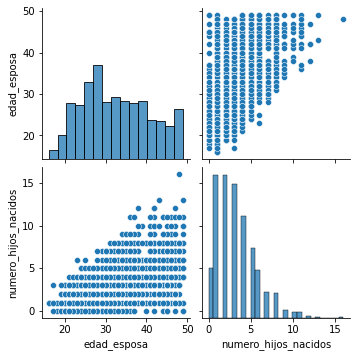

In [16]:
cols=['edad_esposa','numero_hijos_nacidos']
sns.pairplot(df_metodoanticonceptivo[cols],height=2.5)
plt.show()